# **Customer Segmentation using Unsupervised Learning**

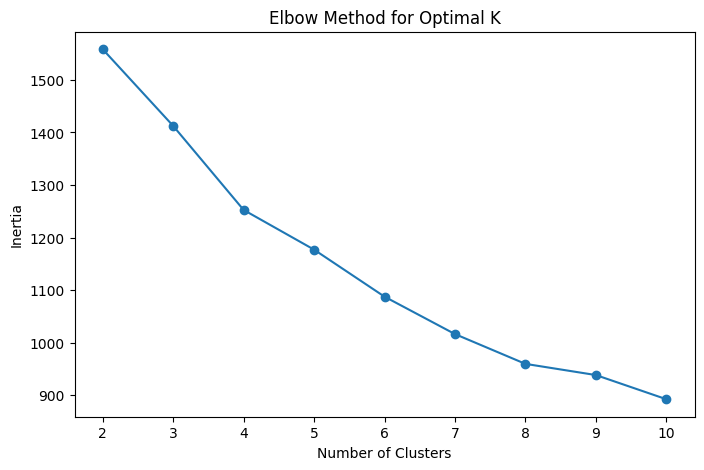

Silhouette Score (KMeans): 0.136


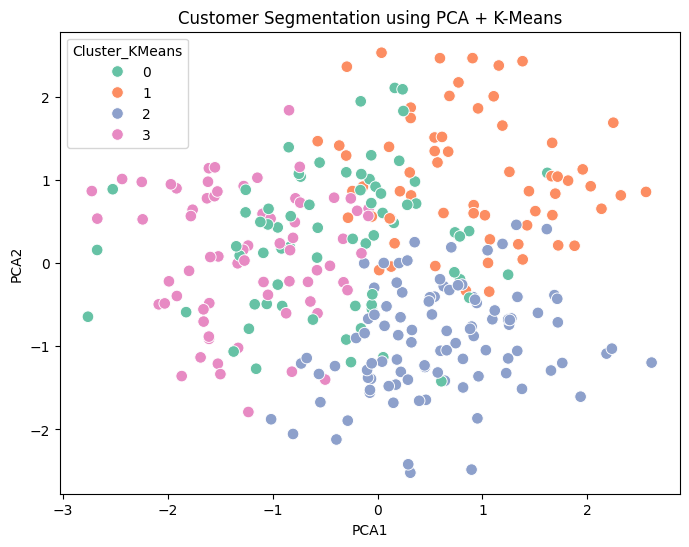

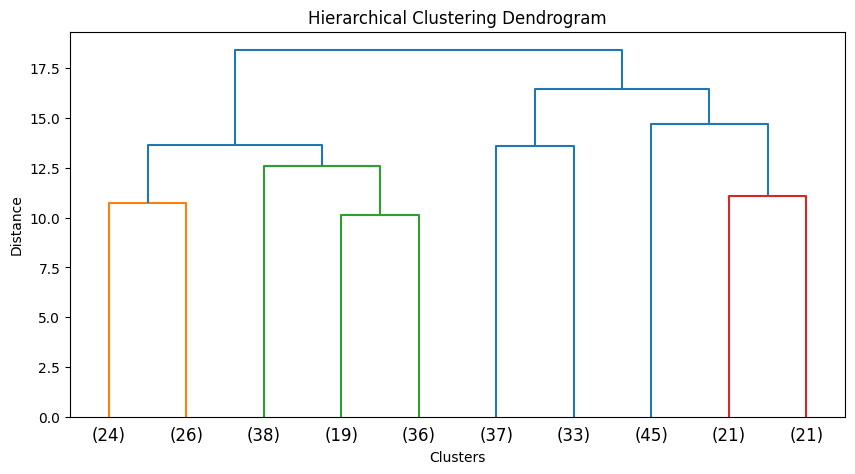

Dataset saved as 'Customer_Data.csv'


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Step 1: Create synthetic dataset
np.random.seed(42)
n = 300


data = {
    'Customer_Age': np.random.randint(18, 65, n),
    'Annual_Income': np.random.uniform(20000, 150000, n).round(2),
    'Spending_Score': np.random.uniform(1, 100, n).round(2),
    'Savings': np.random.uniform(1000, 50000, n).round(2),
    'Debt_Level': np.random.uniform(0, 50000, n).round(2),
    'Online_Purchase_Frequency': np.random.randint(1, 20, n)
}
df=pd.DataFrame(data)
#step 2:feature scaling
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)
# Step 3: K-Means clustering
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
# Elbow method
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster_KMeans']=kmeans.fit_predict(scaled_data)

# Step 5: Evaluate clustering
sil_score = silhouette_score(scaled_data, df['Cluster_KMeans'])
print(f"Silhouette Score (KMeans): {sil_score:.3f}")

# Step 6: PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
df['PCA1'], df['PCA2'] = pca_result[:,0], pca_result[:,1]


plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster_KMeans',palette='Set2',s=70)
plt.title("Customer Segmentation using PCA + K-Means")
plt.show()

# Step 7: Hierarchical clustering (bonus)
linkage_matrix = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, truncate_mode='lastp', p=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Clusters")
plt.ylabel("Distance")
plt.show()
# Save dataset
df.to_csv("Customer_Data.csv", index=False)
print("Dataset saved as 'Customer_Data.csv'")